In [1]:
import numpy as np
import pandas as pd
import quandl, math, datetime, pickle
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style


In [2]:
style.use('ggplot')

In [3]:
quandl.ApiConfig.api_key = "k3W9Vsn35rKk4ry--zEb"
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [5]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [6]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_Change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [7]:
forcast_col = 'Adj. Close'
df.fillna(-9999, inplace=True)


forcast_out = int(math.ceil(0.01*len(df)))

df['Label'] = df[forcast_col].shift(-forcast_out)


forcast_out

35

In [8]:


X = np.array(df.drop(['Label'],1))
X = preprocessing.scale(X)
X_lately = X[-forcast_out:]
X = X[:-forcast_out]





df.dropna(inplace=True)


y = np.array(df['Label'])




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=10)


clf = LinearRegression()

clf.fit(X_train, y_train)

with open("first_clf.pickle", "wb") as file:
    pickle.dump(clf, file)
    

predictions = clf.predict(X_lately)

accuracy = clf.score(X_test, y_test)

last_day = df.iloc[-1].name
last_unix = last_day.timestamp()
one_day = 85400

next_unix = last_unix + one_day

df['Forcast'] = np.nan

for i in predictions:
    
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    
    df.loc[next_date] = [np.nan for j in range(len(df.columns)-1)] + [i]


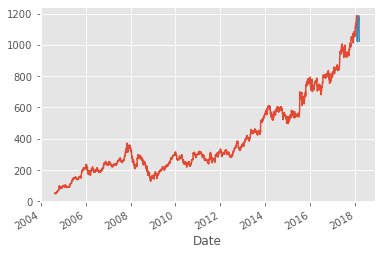

In [9]:
df['Adj. Close'].plot()
df['Forcast'].plot()
plt.show()